# Introduction

In [ ]:
"""
What? Tokenisation - Stemming - Lemmatisation - Stopword - Posttagging

https://github.com/practical-nlp/practical-nlp/blob/master/Ch2/01_WebScraping_using_BeautifulSoup.ipynb
Harshit Surana, Practical Natural Language Processing
"""

# Import libraries/modules

In [ ]:
"""
If you dod not have spacy installed use:

!pip install spacy==3.0.5
!python -m spacy download en_core_web_sm
"""

In [ ]:
import re
import string
from pprint import pprint
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from spacy.lang.en.stop_words import STOP_WORDS
import spacy
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Dataset/corpus

In [1]:
#This will be our corpus which we will work on
corpus_original = "Need to finalize the demo corpus which will be used for this notebook and it should be done soon !!. It should be done by the ending of this month. But will it? This notebook has been run 4 times !!"
corpus = "Need to finalize the demo corpus which will be used for this notebook & should be done soon !!. It should be done by the ending of this month. But will it? This notebook has been run 4 times !!"

In [2]:
# Lower case the corpus
corpus = corpus.lower()
print(corpus)

need to finalize the demo corpus which will be used for this notebook & should be done soon !!. it should be done by the ending of this month. but will it? this notebook has been run 4 times !!


In [4]:
# Removing digits in the corpus
corpus = re.sub(r'\d+','', corpus)
print(corpus)

need to finalize the demo corpus which will be used for this notebook & should be done soon !!. it should be done by the ending of this month. but will it? this notebook has been run  times !!


In [6]:
# Removing punctuations
corpus = corpus.translate(str.maketrans('', '', string.punctuation))
print(corpus)

need to finalize the demo corpus which will be used for this notebook  should be done soon  it should be done by the ending of this month but will it this notebook has been run  times 


In [7]:
# Removing trailing whitespaces
corpus = ' '.join([token for token in corpus.split()])
corpus

'need to finalize the demo corpus which will be used for this notebook should be done soon it should be done by the ending of this month but will it this notebook has been run times'

# Tokenisation

In [ ]:
"""
We'll compare two libraries:
    [1] NLTK
    [2] SPACY
"""

In [12]:
# NLTK
stop_words_nltk = set(stopwords.words('english'))
tokenized_corpus_nltk = word_tokenize(corpus)
print("\nNLTK\nTokenized corpus:",tokenized_corpus_nltk)
tokenized_corpus_without_stopwords = [i for i in tokenized_corpus_nltk if not i in stop_words_nltk]
print("Tokenized corpus without stopwords:",tokenized_corpus_without_stopwords)


NLTK
Tokenized corpus: ['need', 'to', 'finalize', 'the', 'demo', 'corpus', 'which', 'will', 'be', 'used', 'for', 'this', 'notebook', 'should', 'be', 'done', 'soon', 'it', 'should', 'be', 'done', 'by', 'the', 'ending', 'of', 'this', 'month', 'but', 'will', 'it', 'this', 'notebook', 'has', 'been', 'run', 'times']
Tokenized corpus without stopwords: ['need', 'finalize', 'demo', 'corpus', 'used', 'notebook', 'done', 'soon', 'done', 'ending', 'month', 'notebook', 'run', 'times']


In [13]:
# SPACY 
spacy_model = spacy.load('en_core_web_sm')
stopwords_spacy = spacy_model.Defaults.stop_words
print("\nSpacy:")
tokenized_corpus_spacy = word_tokenize(corpus)
print("Tokenized corpus:",tokenized_corpus_spacy)
tokens_without_sw= [word for word in tokenized_corpus_spacy if not word in stopwords_spacy]
print("Tokenized corpus without stopwords",tokens_without_sw)


Spacy:
Tokenized corpus: ['need', 'to', 'finalize', 'the', 'demo', 'corpus', 'which', 'will', 'be', 'used', 'for', 'this', 'notebook', 'should', 'be', 'done', 'soon', 'it', 'should', 'be', 'done', 'by', 'the', 'ending', 'of', 'this', 'month', 'but', 'will', 'it', 'this', 'notebook', 'has', 'been', 'run', 'times']
Tokenized corpus without stopwords ['need', 'finalize', 'demo', 'corpus', 'notebook', 'soon', 'ending', 'month', 'notebook', 'run', 'times']


In [14]:
print("Difference between NLTK and spaCy output:\n",
      set(tokenized_corpus_without_stopwords)-set(tokens_without_sw))

Difference between NLTK and spaCy output:
 {'done', 'used'}


# Stemming

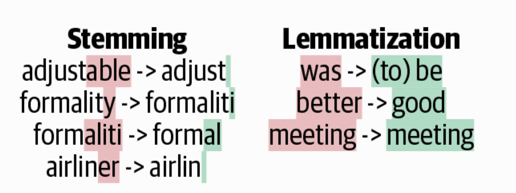

In [18]:
print("Before Stemming:")
print(corpus)

print("After Stemming:")
stemmer= PorterStemmer()
for word in tokenized_corpus_nltk:
    print(stemmer.stem(word),end=" ")

Before Stemming:
need to finalize the demo corpus which will be used for this notebook should be done soon it should be done by the ending of this month but will it this notebook has been run times
After Stemming:
need to final the demo corpu which will be use for thi notebook should be done soon it should be done by the end of thi month but will it thi notebook ha been run time 

# Lemmatization

In [ ]:
nltk.download('wordnet')
lemmatizer=WordNetLemmatizer()

for word in tokenized_corpus_nltk:
    print(lemmatizer.lemmatize(word),end=" ")

# POS Tagging

In [ ]:
#POS tagging using spacy
print("POS Tagging using spacy:")
doc = spacy_model(corpus_original)
# Token and Tag
for token in doc:
    print(token,":", token.pos_)

#pos tagging using nltk
nltk.download('averaged_perceptron_tagger')
print("POS Tagging using NLTK:")
pprint(nltk.pos_tag(word_tokenize(corpus_original)))